# Using linear regression to determine wine quality

## Import data and modules

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [179]:
white_wine = pd.read_csv('winequality-white.csv')

## Inspect and clean data

In [180]:
white_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [181]:
# all data is in one column; split data on ';'
white_wine = white_wine['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";",expand=True)

In [182]:
white_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [183]:
# rename columns
white_wine = white_wine.rename(columns={
    0: "fixed_acidity", 
    1: 'volatile_acidity',
    2: 'citric_acid',
    3: 'residual_sugar',
    4: 'chlorides',
    5: 'free_sulfur_dioxide',
    6: 'total_sulfur_dioxide',
    7: 'density',
    8: 'pH',
    9: 'sulphates',
    10: 'alcohol',
    11: 'quality'
    })

In [184]:
# change dtypes from object to float
white_wine = white_wine.apply(pd.to_numeric)

In [185]:
# examine summary statistics
white_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [186]:
# examine number of unique values for each variable
white_wine.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

## Explore data

In [187]:
#boxplot = white_wine.boxplot(column=['fixed_acidity'])

In [188]:
#boxplot = white_wine.boxplot(column=['volatile_acidity', 'citric_acid'])

In [189]:
#boxplot = white_wine.boxplot(column=['residual_sugar'])

## Explore relationships between variables

In [191]:
# create correlation matric
corr = white_wine.corr()

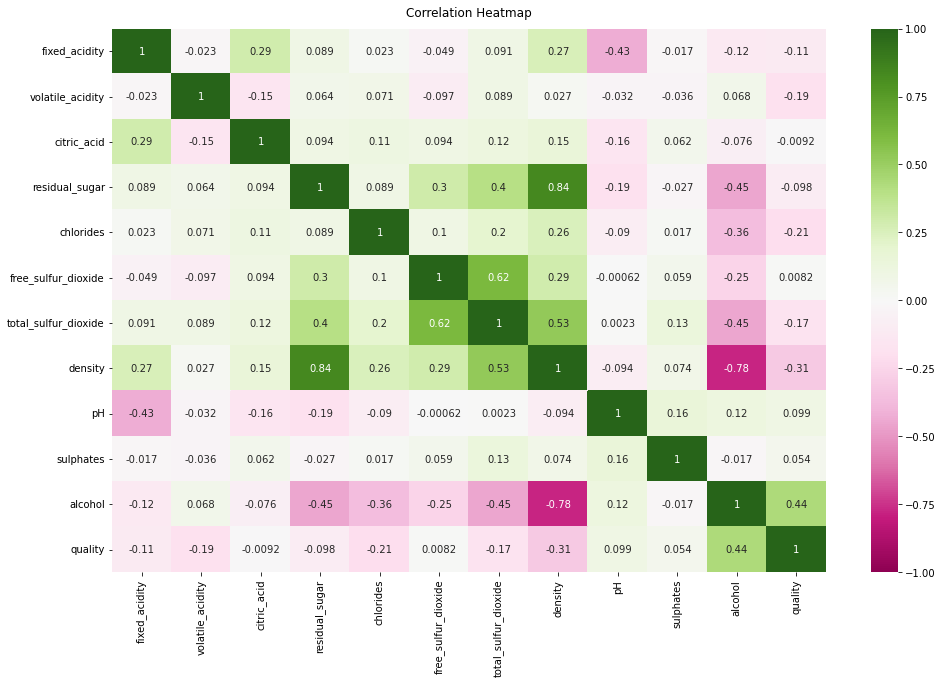

In [192]:
# create heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,cmap="PiYG", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [193]:
# define function to get top pairwise correlations
# function adapted from from stackoverflow: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(white_wine_numeric):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = white_wine_numeric.columns
    for i in range(0, white_wine_numeric.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = white_wine_numeric.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

In [ ]:
# call function using white_wine
correlations = get_correlations(white_wine_numeric)

In [94]:
# view top correlations
correlations.head(10)

residual_sugar        density                 0.838966
density               alcohol                 0.780138
free_sulfur_dioxide   total_sulfur_dioxide    0.615501
total_sulfur_dioxide  density                 0.529881
residual_sugar        alcohol                 0.450631
total_sulfur_dioxide  alcohol                 0.448892
alcohol               quality                 0.435575
fixed_acidity         pH                      0.425858
residual_sugar        total_sulfur_dioxide    0.401439
chlorides             alcohol                 0.360189
dtype: float64

# Linear Regression Model

## Model A (single variable)

### Split dataset into training and test set

In [95]:
# independent variable
x = white_wine[['alcohol']]

# depedent variable
y = white_wine[['quality']]

In [96]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 1)
(980, 1)
(3918, 1)
(980, 1)


### Create Linear Regression Model

In [98]:
# reshape X
x = x.values.reshape(-1, 1)

In [99]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

### Visualize results

Text(0.5, 1.0, 'Alcohol v. Quality')

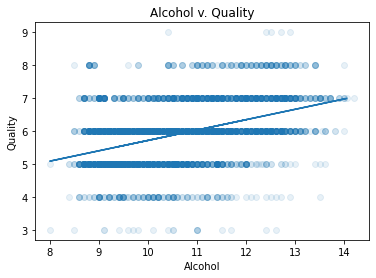

In [100]:
plt.clf()
plt.scatter(x,y,alpha=0.1)
plt.plot(x_test, y_predict)
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Alcohol v. Quality")

Text(0.5, 1.0, 'Quality - actual v. predicted')

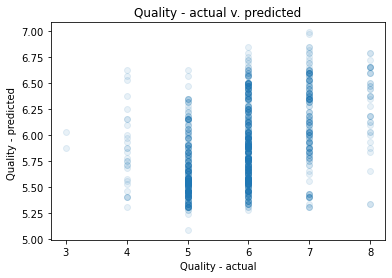

In [101]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.1)
plt.xlabel("Quality - actual")
plt.ylabel("Quality - predicted ")
plt.title("Quality - actual v. predicted")

### Evaluate accuracy of model

In [102]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.18791255059496603

In [103]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.19750758953783387

## Model B (single variable)

### Split dataset into training and test set

In [104]:
# independent variable
x = white_wine[['chlorides']]

# depedent variable
y = white_wine[['quality']]

In [105]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [106]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 1)
(980, 1)
(3918, 1)
(980, 1)


### Create Linear Regression Model

In [107]:
# reshape X
x = x.values.reshape(-1, 1)

In [108]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

### Visualize results

Text(0.5, 1.0, 'Chlorides v. Quality')

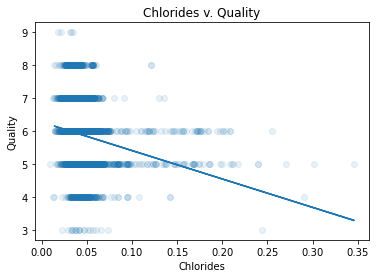

In [109]:
plt.clf()
plt.scatter(x,y,alpha=0.1)
plt.plot(x_test, y_predict)
plt.xlabel("Chlorides")
plt.ylabel("Quality")
plt.title("Chlorides v. Quality")

Text(0.5, 1.0, 'Quality - actual v. predicted')

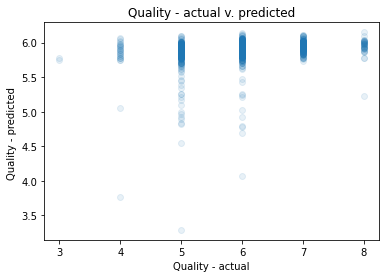

In [110]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.1)
plt.xlabel("Quality - actual")
plt.ylabel("Quality - predicted ")
plt.title("Quality - actual v. predicted")

### Evaluate accuracy of model

In [111]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.04243513354457562

In [112]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.05106595192426666

## Model C (multi-variate)

### Split dataset into training and test set

In [122]:
# independent variable
x = white_wine[['fixed_acidity',
                'volatile_acidity',
                'citric_acid',
                'residual_sugar',
                'chlorides',
                'free_sulfur_dioxide',
                'total_sulfur_dioxide',
                'density',
                'pH',
                'sulphates',
                'alcohol']]

# depedent variable
y = white_wine[['quality']]

In [123]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [124]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 11)
(980, 11)
(3918, 1)
(980, 1)


### Create Linear Regression Model

In [125]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [126]:
# print mlr coefficients
print(regr.coef_)

[[ 1.04463229e-01 -1.88974036e+00  6.62061331e-02  1.04372235e-01
   4.14584364e-02  2.90644086e-03  3.02256440e-04 -2.13778478e+02
   8.34236563e-01  6.67038175e-01  1.24570990e-01]]


### Compare model results to actual results

In [127]:
# define characteristics
#player_a = [[42, 66]]
#predict = regr.predict(player_a)
#print('Predicted winnings %.2f' % predict)
#print('Actual winnings: $201,163')

Text(0.5, 1.0, 'actual quality v. predicted quality')

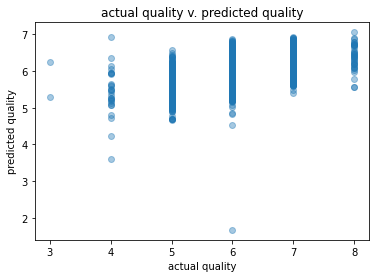

In [128]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual quality")
plt.ylabel("predicted quality")
plt.title("actual quality v. predicted quality")

### Evaluate accuracy of the model

In [129]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.28442901373628315

In [130]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.2604911448919994

## Model D (multi-variate)

### Split dataset into training and test set

In [131]:
# independent variable
x = white_wine[['pH',
                'sulphates',
                'alcohol']]

# depedent variable
y = white_wine[['quality']]

In [132]:
# split data into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [133]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 3)
(980, 3)
(3918, 1)
(980, 1)


### Create Linear Regression Model

In [134]:
# create linear regression model
regr = linear_model.LinearRegression()

# fit model
regr.fit(x_train,y_train)

# predict y values
y_predict = regr.predict(x_test)

In [135]:
# print mlr coefficients
print(regr.coef_)

[[0.15996858 0.42469522 0.31269863]]


### Compare model results to actual results

In [136]:
# define characteristics
#player_a = [[42, 66]]
#predict = regr.predict(player_a)
#print('Predicted winnings %.2f' % predict)
#print('Actual winnings: $201,163')

Text(0.5, 1.0, 'actual quality v. predicted quality')

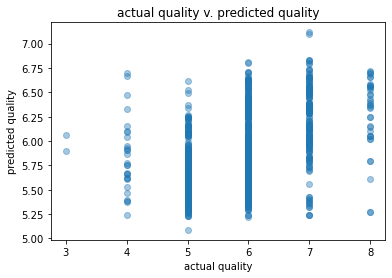

In [137]:
plt.clf()
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual quality")
plt.ylabel("predicted quality")
plt.title("actual quality v. predicted quality")

### Evaluate accuracy of the model

In [138]:
# find the mean squared error regression loss for the training test
regr.score(x_train, y_train)

0.19209861962673913

In [139]:
# find the mean squared error regression loss for the testing test
regr.score(x_test, y_test)

0.20627503062320918